In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

with open(r'/content/car_prices.csv') as f:
    df = pd.read_csv(f, dtype={'age': np.float64, 'sibsp': np.int64, 'parch': np.int64})
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [ ]:
numeric_columns = df.select_dtypes(include=[np.number])
column_stats = pd.DataFrame({
    'Count': numeric_columns.count(),
    'Average': numeric_columns.mean(),
    'Max': numeric_columns.max()
})

print(column_stats)

              Count       Average       Max
year          40075   2008.661734    2015.0
condition     29147     29.481044      49.0
odometer      40008  81866.885598  999999.0
mmr           40074  12050.100439  157000.0
sellingprice  40074  11639.548036  156000.0


In [ ]:
non_numeric_columns = df.select_dtypes(exclude=[np.number])

column_stats = []

for column in non_numeric_columns:
    unique_values = df[column].unique()
    total_unique = len(unique_values)
    value_counts = df[column].value_counts()
    highest_count = value_counts.max()
    value_with_highest_count = value_counts.idxmax()
    lowest_count = value_counts.min()
    value_with_lowest_count = value_counts.idxmin()

    column_stats.append({'Column': column,
                         'Total Unique': total_unique,
                         'Highest Count': highest_count,
                         'Value with Highest Count': value_with_highest_count,
                         'Lowest Count': lowest_count,
                         'Value with Lowest Count': value_with_lowest_count})

column_stats = pd.DataFrame(column_stats)

print(column_stats)

          Column  Total Unique  Highest Count  \
0           make            92           6111   
1          model           820           1013   
2           trim          1355           4461   
3           body            42          16418   
4   transmission             3          33251   
5            vin         40060              2   
6          state            36           8746   
7          color            21           8061   
8       interior            19          14253   
9         seller          5229            994   
10      saledate          1088           3518   

                   Value with Highest Count  Lowest Count  \
0                                      Ford             1   
1                                    Altima             1   
2                                      Base             1   
3                                     Sedan             1   
4                                 automatic          1527   
5                         2cndl13f056137366  

In [ ]:
q1=df.year.quantile(0.25)
q3=df.year.quantile(0.75)
q1,q3
IQR=q3-q1
lower_year=q1-IQR*1.5
upper_year=q1+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_year)
print("Upper limit:", upper_year)


IQR: 6.0
q1: 2006.0
q3: 2012.0
Lower limit: 1997.0
Upper limit: 2015.0


In [ ]:
df[ (df.year<lower_year) | (df.year>upper_year)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
5147,1995,Mercedes-Benz,S-Class,S320 LWB,Sedan,automatic,wdbga33e6sa240718,ca,NaN,172358.0,silver,—,ocean auto sales,1125.0,1700.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
5148,1996,Toyota,4Runner,SR5,SUV,automatic,jt3gn86r1t0018360,ca,2.0,227353.0,silver,tan,aaero sweet company,1600.0,1300.0,Wed Dec 17 2014 11:30:00 GMT-0800 (PST)
5150,1995,Mercedes-Benz,E-Class,E320,Sedan,automatic,wdbea32e3sc272295,ca,2.0,241685.0,black,black,newport auto sports,900.0,400.0,Wed Dec 31 2014 11:30:00 GMT-0800 (PST)
5153,1996,Jaguar,XJ-Series,Vanden Plas,Sedan,NaN,sajkx6747tc767428,ca,NaN,82092.0,NaN,NaN,desert plaza auto sales inc,1475.0,4250.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5157,1996,Honda,Accord,EX,Sedan,automatic,1hgcd5666ta074887,ca,NaN,160861.0,white,—,honda of serramonte,850.0,1800.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30277,1992,Honda,Accord,EX,Sedan,automatic,1hgcb7672na124360,fl,NaN,167926.0,gold,brown,crown kia,425.0,550.0,Thu Dec 18 2014 16:50:00 GMT-0800 (PST)
30278,1993,Ford,F-150,XL,Regular Cab,manual,1ftdf15y6pla36630,ne,NaN,57142.0,red,red,woodhouse ford inc,1125.0,1550.0,Thu Dec 18 2014 11:00:00 GMT-0800 (PST)
30279,1992,Jeep,Cherokee,Laredo,SUV,automatic,1j4fj58s1nl102126,nc,1.0,191415.0,white,beige,crossroads ford of indian trail,625.0,1300.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)
30280,1992,Toyota,4Runner,SR5 V6,SUV,automatic,jt3vn39wxn0086154,az,NaN,153478.0,green,gray,bill luke chrysler jeep and dodge inc,1450.0,1200.0,Thu Dec 18 2014 11:00:00 GMT-0800 (PST)


In [ ]:
df_updated= df[ (df.year>=lower_year) & (df.year<=upper_year)]
df_updated

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)
40072,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f85eg172066,tx,37.0,33630.0,—,black,avis budget group,18150.0,17800.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)
40073,2014,Ford,Mustang,V6,Coupe,automatic,1zvbp8am6e5234235,md,NaN,29402.0,red,beige,avis tra,17550.0,14900.0,Tue Dec 23 2014 11:00:00 GMT-0800 (PST)


In [ ]:
q1=df_updated.condition.quantile(0.25)
q3=df_updated.condition.quantile(0.75)
IQR=q3-q1
lower_cond=q1-IQR*1.5
upper_cond=q1+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_cond)
print("Upper limit:", upper_cond)

IQR: 19.0
q1: 22.0
q3: 41.0
Lower limit: -6.5
Upper limit: 50.5


In [ ]:
df_updated[ (df_updated.condition<lower_cond) | (df_updated.condition>upper_cond)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [ ]:
q1=df_updated.mmr.quantile(0.95)
q3=df_updated.mmr.quantile(0.05)
IQR=q3-q1
lower_mmr=q1-IQR*1.5
upper_mmr=q1+IQR*1.5
print("IQR:", IQR)
print("q1:", q1)
print("q3:", q3)
print("Lower limit:", lower_odo)
print("Upper limit:", upper_odo)

IQR: -28400.0
q1: 29700.0
q3: 1300.0


NameError: name 'lower_odo' is not defined

In [ ]:
df_updated[ (df_updated.condition<q3) | (df_updated.condition>q1)]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40068,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f81eg180004,tn,34.0,16533.0,—,gray,avis budget group,20500.0,19400.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)
40069,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f29el302602,tx,41.0,24382.0,black,black,avis budget group,12000.0,13600.0,Tue Jan 07 2014 11:00:00 GMT-0800 (PST)
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)


cau 6

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'condition' hoặc 'sellingprice'
cleaned_car_prices = df.dropna(subset=['condition', 'sellingprice'])

In [ ]:
cleaned_car_prices

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40068,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f81eg180004,tn,34.0,16533.0,—,gray,avis budget group,20500.0,19400.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)
40069,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f29el302602,tx,41.0,24382.0,black,black,avis budget group,12000.0,13600.0,Tue Jan 07 2014 11:00:00 GMT-0800 (PST)
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)


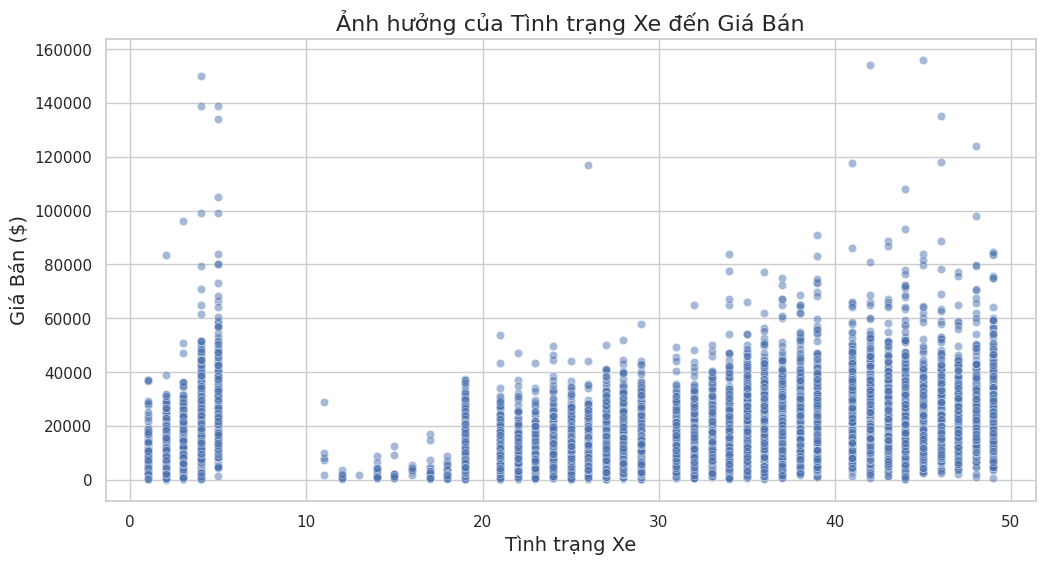

In [ ]:
# Thiết lập kiểu của biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ phân tán
plt.figure(figsize=(12, 6))
sns.scatterplot(x='condition', y='sellingprice', data=cleaned_car_prices, alpha=0.5)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Ảnh hưởng của Tình trạng Xe đến Giá Bán', fontsize=16)
plt.xlabel('Tình trạng Xe', fontsize=14)
plt.ylabel('Giá Bán ($)', fontsize=14)

# Hiển thị biểu đồ
plt.show()

cau 7

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'odometer' hoặc 'sellingprice'
cln = df.dropna(subset=['odometer', 'sellingprice'])

In [ ]:
cln

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40069,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f29el302602,tx,41.0,24382.0,black,black,avis budget group,12000.0,13600.0,Tue Jan 07 2014 11:00:00 GMT-0800 (PST)
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)
40072,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f85eg172066,tx,37.0,33630.0,—,black,avis budget group,18150.0,17800.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)


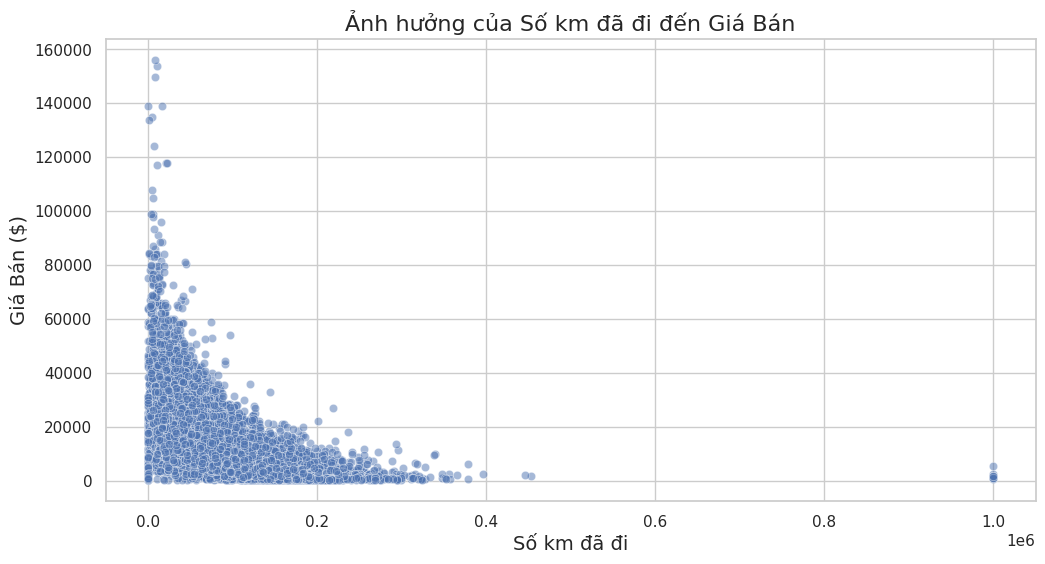

In [ ]:
# Thiết lập kiểu của biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ phân tán
plt.figure(figsize=(12, 6))
sns.scatterplot(x='odometer', y='sellingprice', data=cleaned_car_prices, alpha=0.5)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Ảnh hưởng của Số km đã đi đến Giá Bán', fontsize=16)
plt.xlabel('Số km đã đi', fontsize=14)
plt.ylabel('Giá Bán ($)', fontsize=14)

# Hiển thị biểu đồ
plt.show()

cau 8

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'body' hoặc 'sellingprice'
cln_body = df.dropna(subset=['body', 'sellingprice'])

In [ ]:
cln_body

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40069,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f29el302602,tx,41.0,24382.0,black,black,avis budget group,12000.0,13600.0,Tue Jan 07 2014 11:00:00 GMT-0800 (PST)
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)
40072,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f85eg172066,tx,37.0,33630.0,—,black,avis budget group,18150.0,17800.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)


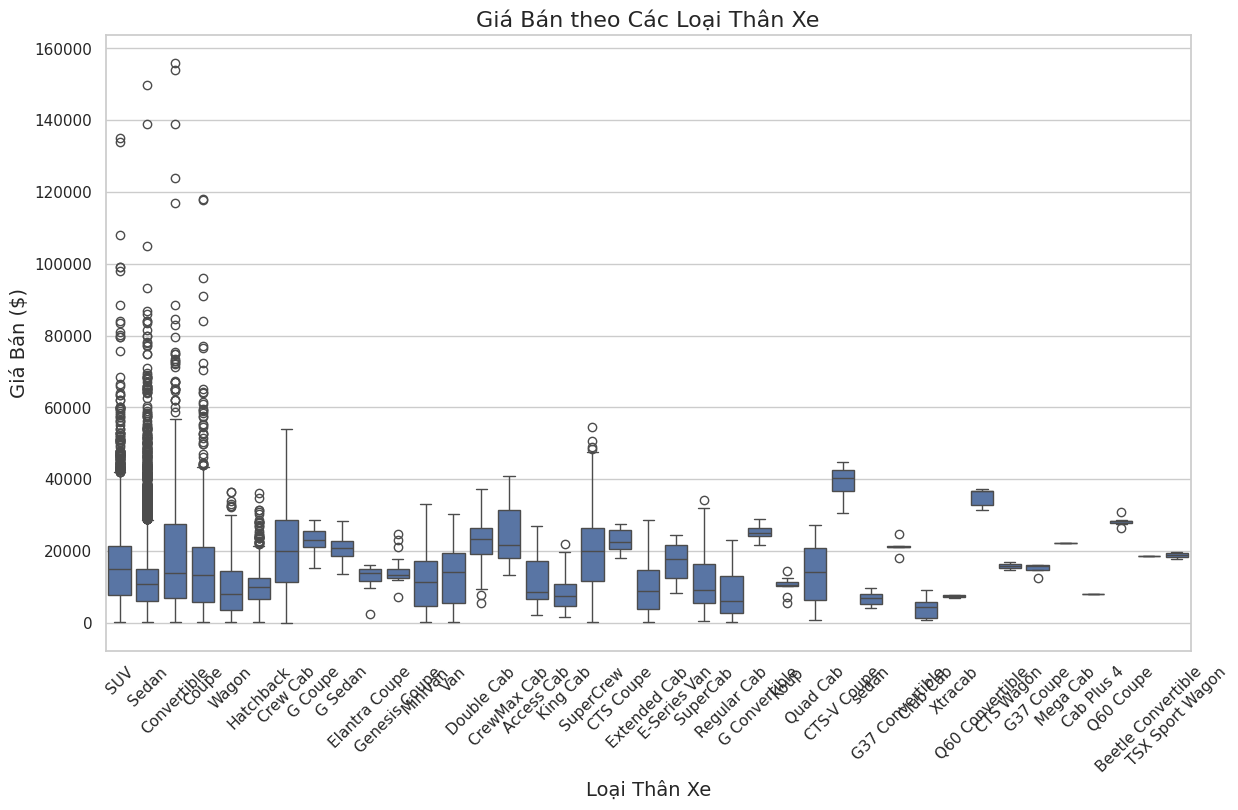

In [ ]:
# Thiết lập kiểu của biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ hộp
plt.figure(figsize=(14, 8))
sns.boxplot(x='body', y='sellingprice', data=cleaned_car_prices)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Giá Bán theo Các Loại Thân Xe', fontsize=16)
plt.xlabel('Loại Thân Xe', fontsize=14)
plt.ylabel('Giá Bán ($)', fontsize=14)

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()

cau 9

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'color' hoặc 'sellingprice'
cln_color = df.dropna(subset=['color', 'sellingprice'])

In [ ]:
cln_color

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40069,2014,Ford,Focus,SE,Sedan,automatic,1fadp3f29el302602,tx,41.0,24382.0,black,black,avis budget group,12000.0,13600.0,Tue Jan 07 2014 11:00:00 GMT-0800 (PST)
40070,2014,Ford,Taurus,SEL,Sedan,NaN,1fahp2h88eg138877,qc,43.0,18239.0,silver,black,ford motor company of canada limited,21900.0,22500.0,Tue Feb 10 2015 02:00:00 GMT-0800 (PST)
40071,2014,Ford,Mustang,GT,Convertible,automatic,1zvbp8ff1e5253205,fl,48.0,6448.0,blue,black,tdaf remarketing,27100.0,26000.0,Mon Dec 22 2014 09:00:00 GMT-0800 (PST)
40072,2014,Ford,Taurus,Limited,Sedan,automatic,1fahp2f85eg172066,tx,37.0,33630.0,—,black,avis budget group,18150.0,17800.0,Tue Dec 23 2014 10:30:00 GMT-0800 (PST)


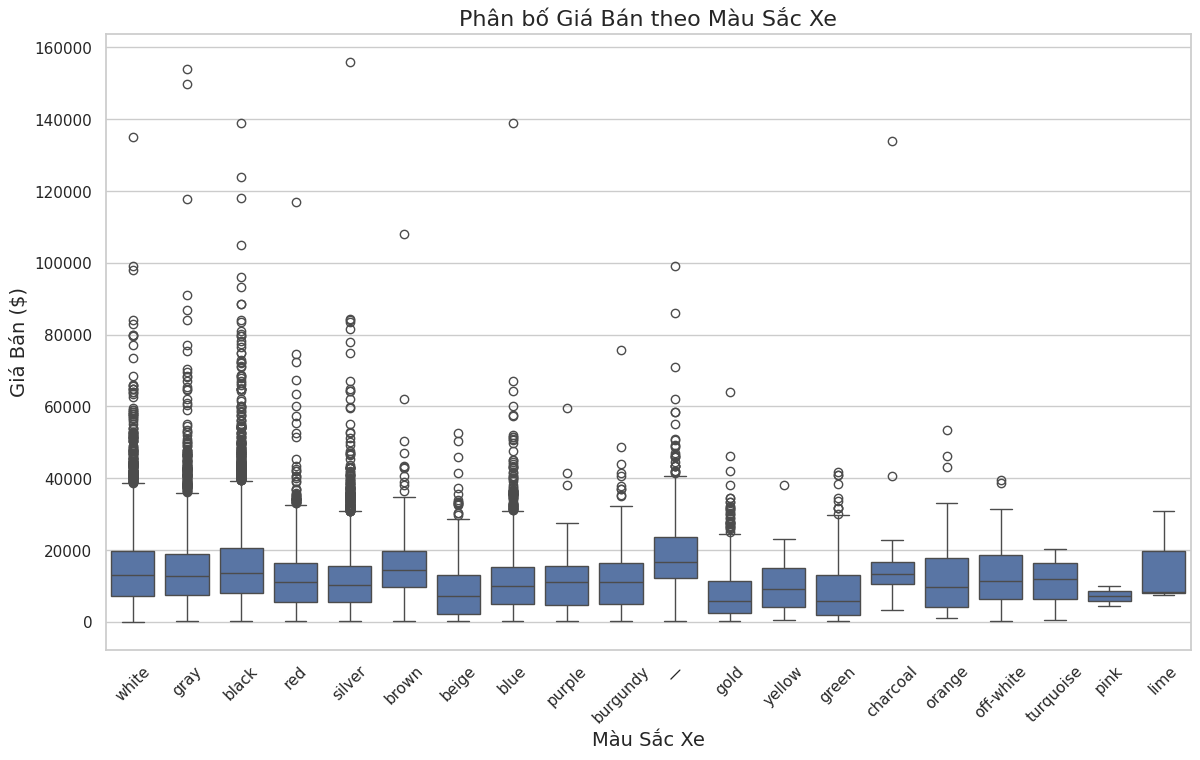

In [ ]:
# Thiết lập kiểu của biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ hộp
plt.figure(figsize=(14, 8))
sns.boxplot(x='color', y='sellingprice', data=cleaned_car_prices)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Phân bố Giá Bán theo Màu Sắc Xe', fontsize=16)
plt.xlabel('Màu Sắc Xe', fontsize=14)
plt.ylabel('Giá Bán ($)', fontsize=14)

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()

cau 10

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'saledate' hoặc 'sellingprice'
cln_date = df.dropna(subset=['saledate', 'sellingprice'])

# Kiểm tra và lọc các giá trị ngày tháng không hợp lệ
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, errors='raise')
        return True
    except:
        return False

# Lọc các hàng có giá trị ngày tháng hợp lệ
cln_date = cln_date[cln_date['saledate'].apply(is_valid_date)]

# Chuyển đổi cột 'saledate' thành định dạng datetime
cln_date['saledate'] = pd.to_datetime(cln_date['saledate'])


<ipython-input-5-b29707b19876>:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cln_date['saledate'] = pd.to_datetime(cln_date['saledate'])


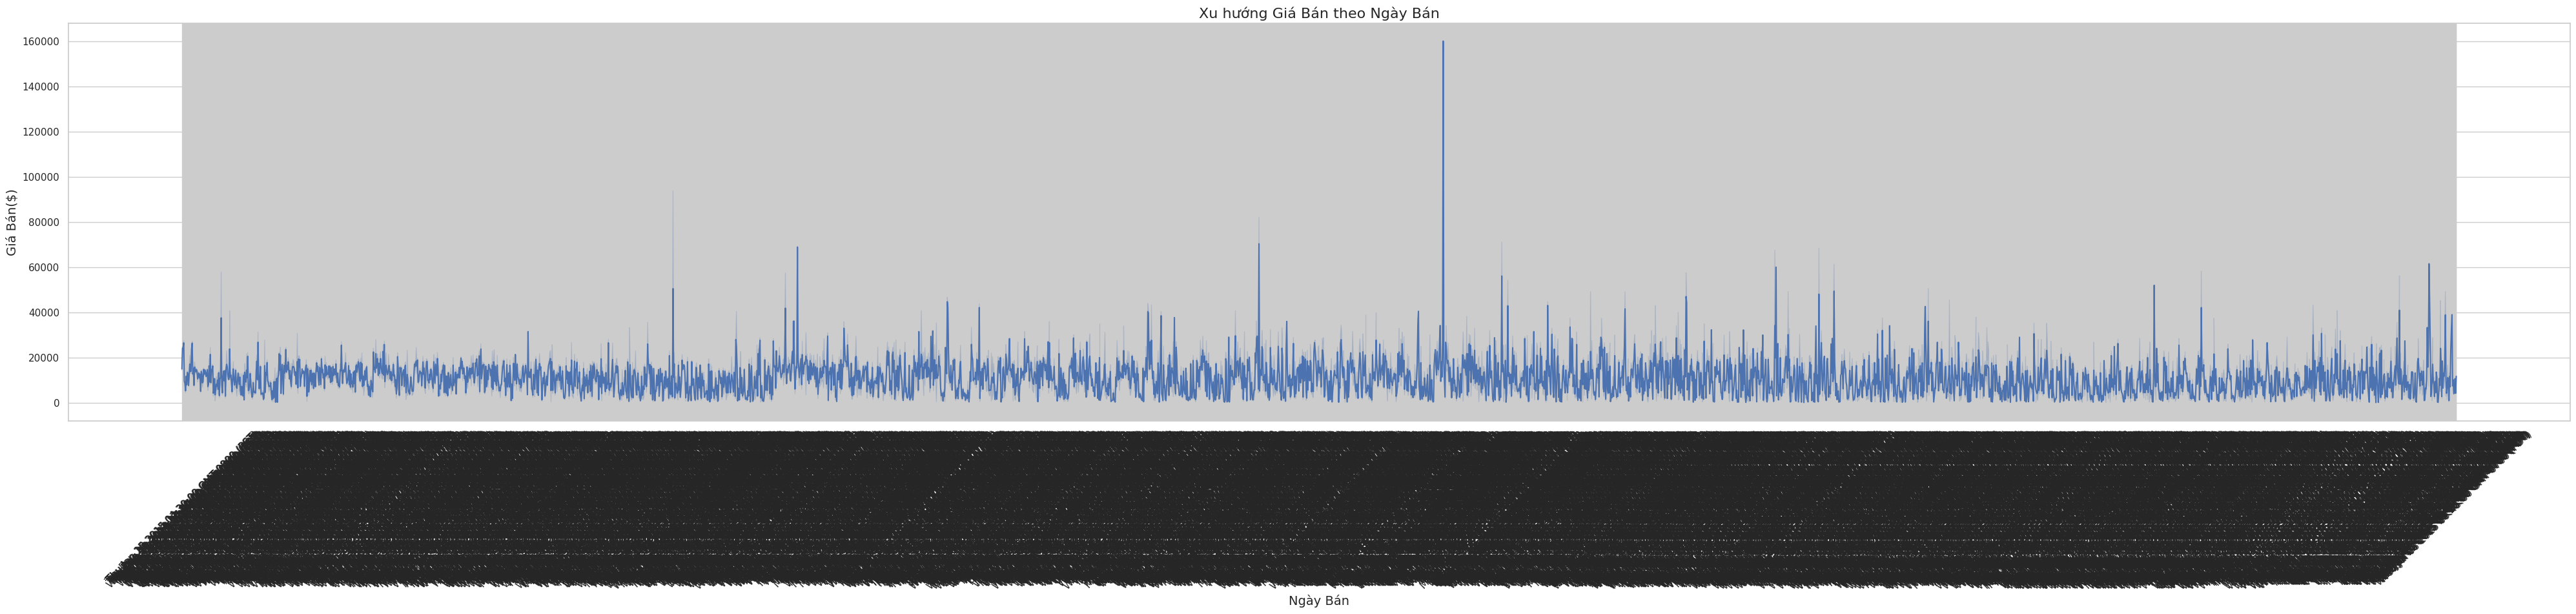

In [ ]:

# Thiết lập kiểu của biểu đồ
sns.set(style="whitegrid")

# Tạo biểu đồ đường
plt.figure(figsize=(50, 8))
sns.lineplot(x='saledate', y='sellingprice', data=df)

# Thiết lập tiêu đề và nhãn cho trục
plt.title('Xu hướng Giá Bán theo Ngày Bán', fontsize=16)
plt.xlabel('Ngày Bán', fontsize=14)
plt.ylabel('Giá Bán($)', fontsize=14)

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45)

# Hiển thị biểu đồ
plt.show()

Cau 11

In [ ]:
# Loại bỏ các hàng có giá trị thiếu trong cột 'state' hoặc 'sellingprice'
cln_state = df.dropna(subset=['state','sellingprice'])

In [ ]:
cln_state

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


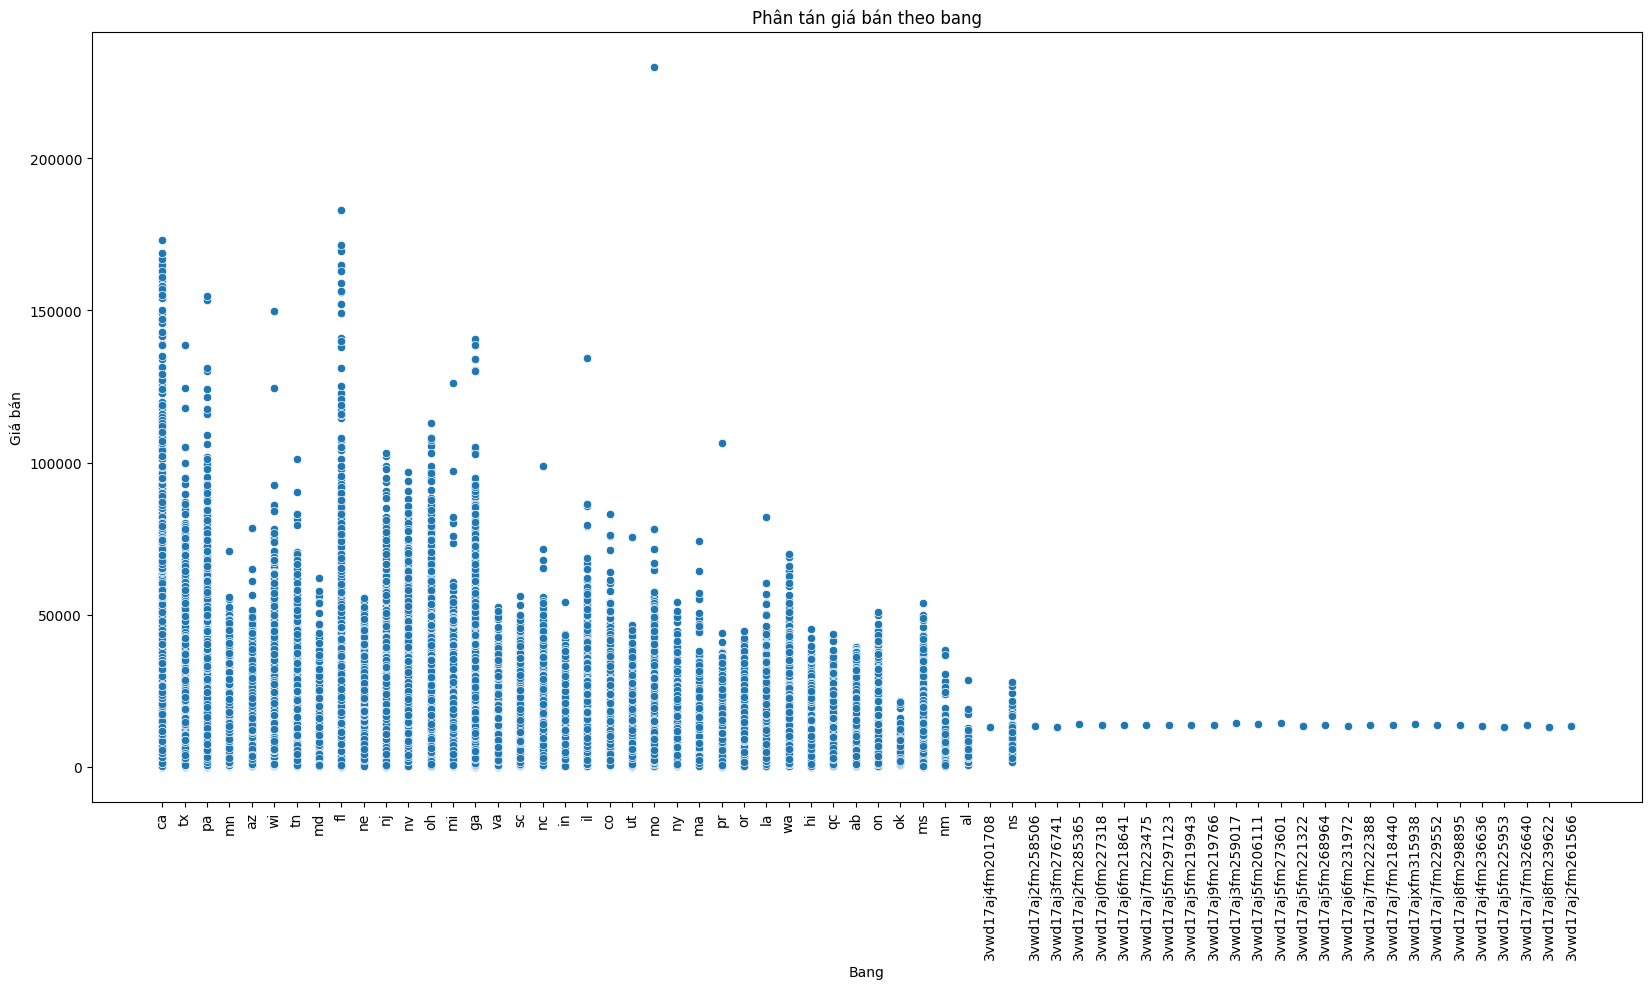

In [ ]:
# Biểu đồ phân tán
plt.figure(figsize=(20, 10))

# Tạo biểu đồ phân tán (scatter plot)
sns.scatterplot(x='state', y='sellingprice', data=df)

# Thêm tiêu đề và nhãn trục
plt.title('Phân tán giá bán theo bang')
plt.xlabel('Bang')
plt.ylabel('Giá bán')

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=90)

# Hiển thị biểu đồ
plt.show()

4. Thu giam du lieu

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [ ]:
df=pd.read_csv("/content/df_updated.csv")
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,saledate_formatted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,1,1,white,black,kia motors america inc,4.0,4.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),16/12/2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,1,1,white,beige,kia motors america inc,4.0,4.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),16/12/2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4,1,gray,black,financial services remarketing (lease),4.0,4.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),15/01/2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,3,1,white,black,volvo na rep/world omni,4.0,4.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),29/01/2015
4,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,1,gray,black,enterprise vehicle exchange / tra / rental / t...,3.0,2.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),30/12/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139073,2012,Dodge,Journey,Crew,SUV,automatic,3c4pdcdg2ct289398,nc,3,3,gray,black,wheels exchange llc,2.0,2.0,Tue Feb 10 2015 01:15:00 GMT-0800 (PST),10/02/2015
139074,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbg8cr224383,nc,2,3,gray,black,ge fleet services for itself/servicer,2.0,2.0,Tue Jan 20 2015 01:15:00 GMT-0800 (PST),20/01/2015
139075,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg4cr324057,va,1,3,silver,black,enterprise vehicle exchange / rental / tulsa,2.0,2.0,Wed Jan 21 2015 01:30:00 GMT-0800 (PST),21/01/2015
139076,2012,FIAT,500,Sport,Hatchback,automatic,3c3cffbr6ct357768,fl,3,2,silver,black,santander consumer,2.0,2.0,Wed Jan 21 2015 01:05:00 GMT-0800 (PST),21/01/2015


In [ ]:
df=df.drop(columns=['saledate'])

In [ ]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate_formatted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,1,1,white,black,kia motors america inc,4.0,4.0,16/12/2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,1,1,white,beige,kia motors america inc,4.0,4.0,16/12/2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4,1,gray,black,financial services remarketing (lease),4.0,4.0,15/01/2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,3,1,white,black,volvo na rep/world omni,4.0,4.0,29/01/2015
4,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,1,gray,black,enterprise vehicle exchange / tra / rental / t...,3.0,2.0,30/12/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139073,2012,Dodge,Journey,Crew,SUV,automatic,3c4pdcdg2ct289398,nc,3,3,gray,black,wheels exchange llc,2.0,2.0,10/02/2015
139074,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbg8cr224383,nc,2,3,gray,black,ge fleet services for itself/servicer,2.0,2.0,20/01/2015
139075,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg4cr324057,va,1,3,silver,black,enterprise vehicle exchange / rental / tulsa,2.0,2.0,21/01/2015
139076,2012,FIAT,500,Sport,Hatchback,automatic,3c3cffbr6ct357768,fl,3,2,silver,black,santander consumer,2.0,2.0,21/01/2015


In [ ]:
df['make']=df['make'].str.strip()
df['model']=df['model'].str.strip()
df['trim']=df['trim'].str.strip()
df['body']=df['body'].str.strip()
df['transmission']=df['transmission'].str.strip()
df['vin']=df['vin'].str.strip()
df['state']=df['state'].str.strip()
df['color']=df['color'].str.strip()
df['interior']=df['interior'].str.strip()
df['seller']=df['seller'].str.strip()
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate_formatted
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,1,1,white,black,kia motors america inc,4.0,4.0,16/12/2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,1,1,white,beige,kia motors america inc,4.0,4.0,16/12/2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4,1,gray,black,financial services remarketing (lease),4.0,4.0,15/01/2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,3,1,white,black,volvo na rep/world omni,4.0,4.0,29/01/2015
4,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1,1,gray,black,enterprise vehicle exchange / tra / rental / t...,3.0,2.0,30/12/2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139073,2012,Dodge,Journey,Crew,SUV,automatic,3c4pdcdg2ct289398,nc,3,3,gray,black,wheels exchange llc,2.0,2.0,10/02/2015
139074,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbg8cr224383,nc,2,3,gray,black,ge fleet services for itself/servicer,2.0,2.0,20/01/2015
139075,2012,Dodge,Grand Caravan,SXT,Minivan,automatic,2c4rdgcg4cr324057,va,1,3,silver,black,enterprise vehicle exchange / rental / tulsa,2.0,2.0,21/01/2015
139076,2012,FIAT,500,Sport,Hatchback,automatic,3c3cffbr6ct357768,fl,3,2,silver,black,santander consumer,2.0,2.0,21/01/2015


Naive Bayes

In [ ]:
filepath='/content/df_updated2.csv'
df.to_csv(filepath,index=False)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import time

# Đọc dữ liệu từ file CSV
data = pd.read_csv("/content/df_updated2.csv")

# Loại bỏ các hàng có giá trị NaN trong cột 'sellingprice'
data = data.dropna(subset=['sellingprice'])

# Lựa chọn các cột đặc trưng (features) và nhãn (label)
features = data[['year', 'make', 'model', 'body', 'color', 'condition']]
label = data['sellingprice']

# Chuyển đổi các cột văn bản thành các đặc trưng số
vectorizer = CountVectorizer()

# Kết hợp các cột văn bản thành một cột duy nhất để vector hóa
combined_features = features.apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Vector hóa các đặc trưng
X_vectorized = vectorizer.fit_transform(combined_features)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, label, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình Naive Bayes
model = MultinomialNB()

# Đo thời gian huấn luyện
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

# Tính thời gian huấn luyện
training_time = end_time - start_time
print(f'Thời gian huấn luyện: {training_time:.2f} giây')

# Đo thời gian dự đoán
start_time = time.time()
y_pred = model.predict(X_test)
end_time = time.time()

# Tính thời gian dự đoán
prediction_time1 = end_time - start_time
print(f'Thời gian dự đoán: {prediction_time1:.2f} giây')

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Report: ", report)


Thời gian huấn luyện: 0.03 giây
Thời gian dự đoán: 0.00 giây
Accuracy:  0.6542637331032499
Report:                precision    recall  f1-score   support

         1.0       0.76      0.79      0.78      7612
         2.0       0.58      0.49      0.53      6767
         3.0       0.56      0.53      0.54      6844
         4.0       0.69      0.79      0.73      6593

    accuracy                           0.65     27816
   macro avg       0.65      0.65      0.65     27816
weighted avg       0.65      0.65      0.65     27816



SVM

In [ ]:
!pip install imbalanced-learn

In [14]:
import pandas as pd

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/update3.csv')

# Kiểm tra dữ liệu
print(df.head())
print(df.info())

from sklearn.preprocessing import LabelEncoder

# Chọn các cột phân loại cần chuyển đổi
categorical_cols = ['condition', 'make', 'body', 'color', 'sellingprice']

# Khởi tạo LabelEncoder cho từng cột
label_encoders = {col: LabelEncoder() for col in categorical_cols}

# Áp dụng LabelEncoder cho từng cột
for col in categorical_cols:
    df[col] = label_encoders[col].fit_transform(df[col])

# Kiểm tra lại dữ liệu sau khi mã hóa
print(df.head())

from sklearn.model_selection import train_test_split

# Chọn các đặc trưng (features) và nhãn (target)
X = df[['odometer', 'condition', 'make', 'year', 'body', 'color']]
y = df['sellingprice']  # 'price' là cột đích cần dự đoán

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Xây dựng pipeline với scaler và mô hình SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='linear'))  # Có thể thử các kernel khác như 'rbf'
])

from sklearn.metrics import accuracy_score, classification_report
import time

# Đo thời gian huấn luyện
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()

# Tính thời gian huấn luyện
training_time1 = end_time - start_time
print(f'Thời gian huấn luyện: {training_time1:.2f} giây')

# Đo thời gian dự đoán
start_time = time.time()
y_pred = pipeline.predict(X_test)
end_time = time.time()

# Tính thời gian dự đoán
prediction_time = end_time - start_time
print(f'Thời gian dự đoán: {prediction_time:.2f} giây')

# Tính toán và in ra độ chính xác (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# In ra báo cáo chi tiết (classification report)
report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{report}')


       year    make     model        trim   body transmission  \
0  1.000000     Kia   Sorento          LX    SUV    automatic   
1  1.000000     Kia   Sorento          LX    SUV    automatic   
2  0.941176     BMW  3 Series  328i SULEV  Sedan    automatic   
3  1.000000   Volvo       S60          T5  Sedan    automatic   
4  1.000000  Nissan    Altima       2.5 S  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca   0.000000       0.0  white    black   
1  5xyktca69fg561319    ca   0.000000       0.0  white    beige   
2  wba3c1c51ek116351    ca   1.000000       0.0   gray    black   
3  yv1612tb4f1310987    ca   0.666667       0.0  white    black   
4  1n4al3ap1fn326013    ca   0.000000       0.0   gray    black   

                                              seller       mmr  sellingprice  \
0                            kia motors america  inc  1.000000      1.000000   
1                            kia motors americ

Hung

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import six
import sys
sys.modules['sklearn.externals.six'] = six

# Đọc dữ liệu
df = pd.read_csv('/content/update3.csv')

# Lựa chọn các thuộc tính cần thiết (giả sử 'sellingprice' là nhãn cần dự đoán)
# Đối với ID3, cần chuyển đổi các giá trị số sang danh mục (categorical) nếu cần thiết
# Chúng ta có thể sử dụng pd.cut hoặc tạo các bucket cho các giá trị liên tục như 'odometer', 'mmr', 'year'

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Tách dữ liệu và nhãn
X_train = train.drop('sellingprice', axis=1)
y_train = train['sellingprice']
X_test = test.drop('sellingprice', axis=1)
y_test = test['sellingprice']


In [7]:
pip install six

In [8]:
pip install decision-tree-id3

In [5]:
pip install "numpy<1.25"

Tree

In [ ]:
# Bắt đầu đếm thời gian
start_time = time.time()

# Khởi tạo và huấn luyện mô hình ID3
clf = Id3Estimator()
clf.fit(X_train, y_train)

# Kết thúc đếm thời gian
end_time = time.time()

# Tính thời gian chạy
id3_time = end_time - start_time
print(f"Thời gian chạy của ID3: {id3_time} giây")

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
from sklearn.metrics import accuracy_score, mean_squared_error

# Đo lường độ chính xác nếu nhãn là dạng phân loại
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy}")

# Hoặc tính lỗi bình phương trung bình nếu nhãn là dạng số liên tục
mse = mean_squared_error(y_test, y_pred)
print(f"Lỗi bình phương trung bình của mô hình: {mse}")

# Xuất cây quyết định
tree_rules = export_text(clf.tree_, feature_names=list(X_train.columns))
print(tree_rules)

In [5]:
from id3 import Id3Estimator
from id3 import export_text
df=df.dropna(subset=['sellingprice'])

unique_makes = df['make'].unique()
print(unique_makes)
make_to_label = {make: i for i, make in enumerate(unique_makes)}
df['make_label'] = df['make'].map(make_to_label)
print(df)

unique_colors = df['color'].unique()
print(unique_colors)
color_to_label = {make: i for i, make in enumerate(unique_colors)}
df['color_label'] = df['color'].map(color_to_label)
print(df)

unique_bodies = df['body'].unique()
print(unique_bodies)
body_to_label = {make: i for i, make in enumerate(unique_bodies)}
df['body_label'] = df['body'].map(body_to_label)

X = df[['make_label', 'odometer', 'body_label', 'color_label',  'condition','year']]
y = df['sellingprice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

print("------Decision Tree------")

# Khởi tạo và huấn luyện mô hình DecisionTreeRegressor
start_time = time.time()
clf = DecisionTreeRegressor(random_state=42)
clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time
print(f"Thời gian chạy của DecisionTreeRegressor: {dt_time} giây")

# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
print(f"Lỗi bình phương trung bình của mô hình: {mse}")

['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Buick' 'Acura'
 'Hyundai' 'Cadillac' 'Infiniti' 'Lexus' 'Mitsubishi' 'Mercedes-Benz'
 'Jeep' 'Mazda' 'MINI' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'bmw' 'Dodge' 'FIAT' 'Chrysler' 'ford' 'Honda' 'GMC'
 'mitsubishi' 'Ram' 'smart' 'Land Rover' 'chevrolet' 'chrysler' 'pontiac'
 'Pontiac' 'Unknown' 'Saturn' 'Mercury' 'HUMMER' 'landrover' 'cadillac'
 'mercedes' 'mazda' 'toyota' 'lexus' 'honda' 'Porsche' 'nissan'
 'land rover' 'Saab' 'porsche' 'Suzuki' 'Oldsmobile' 'oldsmobile' 'dodge'
 'jeep' 'acura' 'subaru' 'suzuki' 'kia' 'maserati' 'mercury' 'gmc'
 'Maserati' 'volkswagen' 'Isuzu' 'hyundai' 'ford tk' 'plymouth'
 'ford truck' 'Plymouth' 'buick' 'audi' 'dot' 'gmc truck' 'vw'
 'mercedes-b' 'Daewoo']
            year    make          model                    trim       body  \
0       1.000000     Kia        Sorento                      LX        SUV   
1       1.000000     Kia        Sorento                

KNN

In [1]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Tải và xử lý dữ liệu
file_path = '/content/update3.csv'
df = pd.read_csv(file_path)

# Xử lý các giá trị thiếu (nếu có)
df.fillna(method='ffill', inplace=True)

# Chuyển đổi các thuộc tính cần thiết thành số (nếu cần)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

# 2. Chuẩn bị dữ liệu cho KNN
X = df.drop('sellingprice', axis=1)  # Các thuộc tính đặc trưng
y = df['sellingprice']  # Thuộc tính mục tiêu

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3. Khởi tạo và huấn luyện KNN
start_time = time.time()
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
end_time = time.time()

# 4. Dự đoán và đánh giá
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R-squared: {r2:.4f}")


# Lưu lại thời gian chạy thuật toán
execution_time = end_time - start_time
print(f"Thời gian chạy thuật toán: {execution_time:.4f} giây")

# 5. Hiển thị kết quả dự đoán
# plt.figure(figsize=(10, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.xlabel("Giá bán thực tế")
# plt.ylabel("Giá bán dự đoán")
# plt.title("Dự đoán giá bán sử dụng KNN")
# plt.show()

# 6. Hiển thị phân phối lỗi
# errors = y_test - y_pred
# plt.figure(figsize=(10, 6))
# sns.histplot(errors, kde=True)
# plt.xlabel("Sai số dự đoán")
# plt.title("Phân phối sai số dự đoán")
# plt.show()


Mean Squared Error: 0.0189
Mean Absolute Error: 0.0840
R-squared: 0.8659
Thời gian chạy thuật toán: 1.2468 giây


random forest

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
from dateutil import parser
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

df=pd.read_csv('/content/update3.csv')
df=df.dropna()
df.isnull().sum()

unique_makes = df['make'].unique()
print(unique_makes)
make_to_label = {make: i for i, make in enumerate(unique_makes)}
df['make_label'] = df['make'].map(make_to_label)
print(df)

unique_colors = df['color'].unique()
print(unique_colors)
color_to_label = {make: i for i, make in enumerate(unique_colors)}
df['color_label'] = df['color'].map(color_to_label)
print(df)

unique_bodies = df['body'].unique()
print(unique_bodies)
body_to_label = {make: i for i, make in enumerate(unique_bodies)}
df['body_label'] = df['body'].map(body_to_label)

X = df[['make_label', 'odometer', 'body_label', 'color_label',  'condition','year']]
y = df['sellingprice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("------Random Forest------")
start_time=time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
print('Training score:', rf_reg.score(X_train, y_train))
print('Testing score:', rf_reg.score(X_test, y_test))

end_time=time.time()
timeRF=(end_time-start_time)
print('Time to finish:',timeRF,'s')

y_pred = rf_reg.predict(X_test)
print("Predicted Values:",y_pred)

# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestRegressor

# # Get the feature importances
# feature_importances = rf_reg.feature_importances_

# plt.figure(figsize=(10, 6))
# plt.bar(range(len(feature_importances)), feature_importances)
# plt.title('Feature Importance')
# plt.xlabel('Feature')
# plt.ylabel('Importance')
# plt.xticks(range(len(feature_importances)), X.columns, rotation=90)
# plt.show()


['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Buick' 'Acura'
 'Hyundai' 'Cadillac' 'Infiniti' 'Lexus' 'Mitsubishi' 'Mercedes-Benz'
 'Jeep' 'Mazda' 'MINI' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen' 'Toyota'
 'Subaru' 'Scion' 'bmw' 'Dodge' 'FIAT' 'Chrysler' 'ford' 'Honda' 'GMC'
 'mitsubishi' 'Ram' 'smart' 'Land Rover' 'chevrolet' 'chrysler' 'pontiac'
 'Pontiac' 'Unknown' 'Saturn' 'Mercury' 'HUMMER' 'landrover' 'cadillac'
 'mercedes' 'mazda' 'toyota' 'lexus' 'honda' 'Porsche' 'nissan'
 'land rover' 'Saab' 'porsche' 'Suzuki' 'Oldsmobile' 'oldsmobile' 'dodge'
 'jeep' 'acura' 'subaru' 'suzuki' 'kia' 'maserati' 'mercury' 'gmc'
 'Maserati' 'volkswagen' 'Isuzu' 'hyundai' 'ford tk' 'plymouth'
 'ford truck' 'Plymouth' 'buick' 'audi' 'dot' 'gmc truck' 'vw'
 'mercedes-b' 'Daewoo']
            year    make          model                    trim       body  \
0       1.000000     Kia        Sorento                      LX        SUV   
1       1.000000     Kia        Sorento                

Bagging Regressor

In [2]:
from sklearn.ensemble import BaggingRegressor
print("------Bagging Regressor------")
start_time=time.time()
bc_reg = BaggingRegressor(random_state=42)
bc_reg.fit(X_train, y_train)
print('Training score:', bc_reg.score(X_train, y_train))
print('Testing score:', bc_reg.score(X_test, y_test))

end_time=time.time()
timeBC=(end_time-start_time)
print('Time to finish:',timeBC,'s')

y_pred = bc_reg.predict(X_test)

# # Create a scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.5)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('Bagging Regressor: Actual vs Predicted')
# plt.show()

# from sklearn.model_selection import learning_curve
# import matplotlib.pyplot as plt
# from sklearn.ensemble import BaggingRegressor

# # Plot the learning curve
# plt.figure(figsize=(10, 6))
# plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
# plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
# plt.xlabel('Training Set Size')
# plt.ylabel('Score')
# plt.title('Learning Curve for Bagging Regressor')
# plt.legend()
# plt.show()

------Bagging Regressor------
Training score: 0.8723431529331973
Testing score: 0.7668024680715813
Time to finish: 2.197479009628296 s


Runtime Comparison

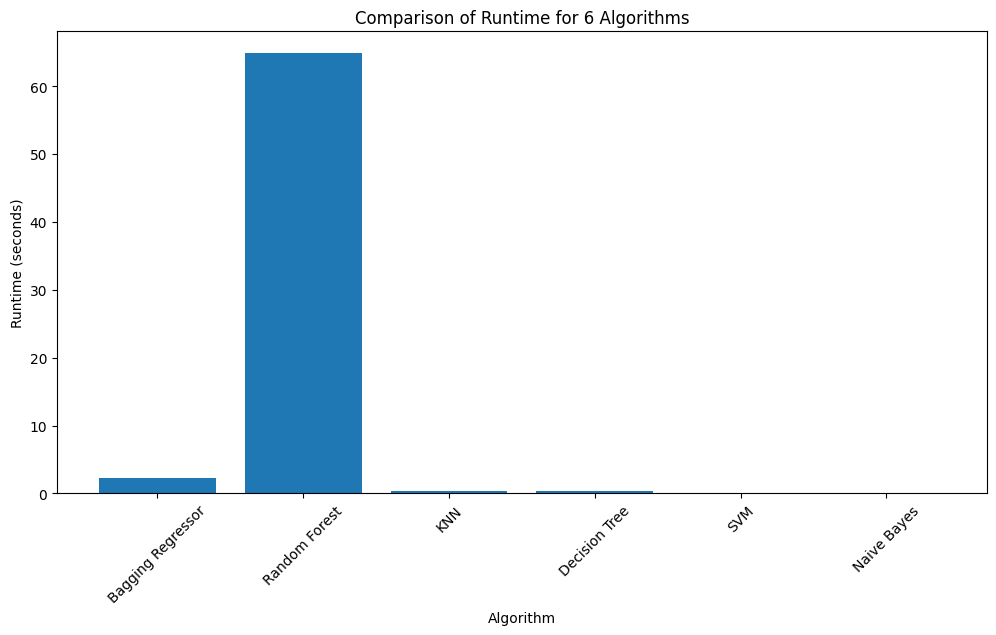

In [19]:
import matplotlib.pyplot as plt

# Tạo dữ liệu cho biểu đồ
algorithm_names = ['Bagging Regressor', 'Random Forest', 'KNN', 'Decision Tree', 'SVM', 'Naive Bayes']
runtimes = [timeBC, timeRF, execution_time, dt_time, prediction_time, prediction_time1]

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.bar(algorithm_names, runtimes)
plt.xlabel('Algorithm')
plt.ylabel('Runtime (seconds)')
plt.title('Comparison of Runtime for 6 Algorithms')
plt.xticks(rotation=45)
plt.show()

Accuracy Comparison

Model: Bagging Regressor
 - Mean Squared Error: 0.0328
 - Mean Absolute Error: 0.1172
 - R-squared: 0.7671
 - Training Time: 2.9731 seconds

Model: Random Forest
 - Mean Squared Error: 0.0318
 - Mean Absolute Error: 0.1161
 - R-squared: 0.7743
 - Training Time: 21.3948 seconds

Model: KNN
 - Mean Squared Error: 0.0420
 - Mean Absolute Error: 0.1386
 - R-squared: 0.7023
 - Training Time: 1.5445 seconds

Model: Decision Tree
 - Mean Squared Error: 0.0382
 - Mean Absolute Error: 0.1179
 - R-squared: 0.7291
 - Training Time: 0.2396 seconds

Model: SVM
 - Mean Squared Error: 0.0536
 - Mean Absolute Error: 0.1811
 - R-squared: 0.6200
 - Training Time: 1838.5564 seconds

Model: Bayesian Ridge
 - Mean Squared Error: 0.0647
 - Mean Absolute Error: 0.2055
 - R-squared: 0.5413
 - Training Time: 0.0684 seconds



<ipython-input-4-908e7319948f>:83: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
<ipython-input-4-908e7319948f>:90: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
<ipython-input-4-908e7319948f>:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
<ipython-input-4-908e7319948f>:104: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)


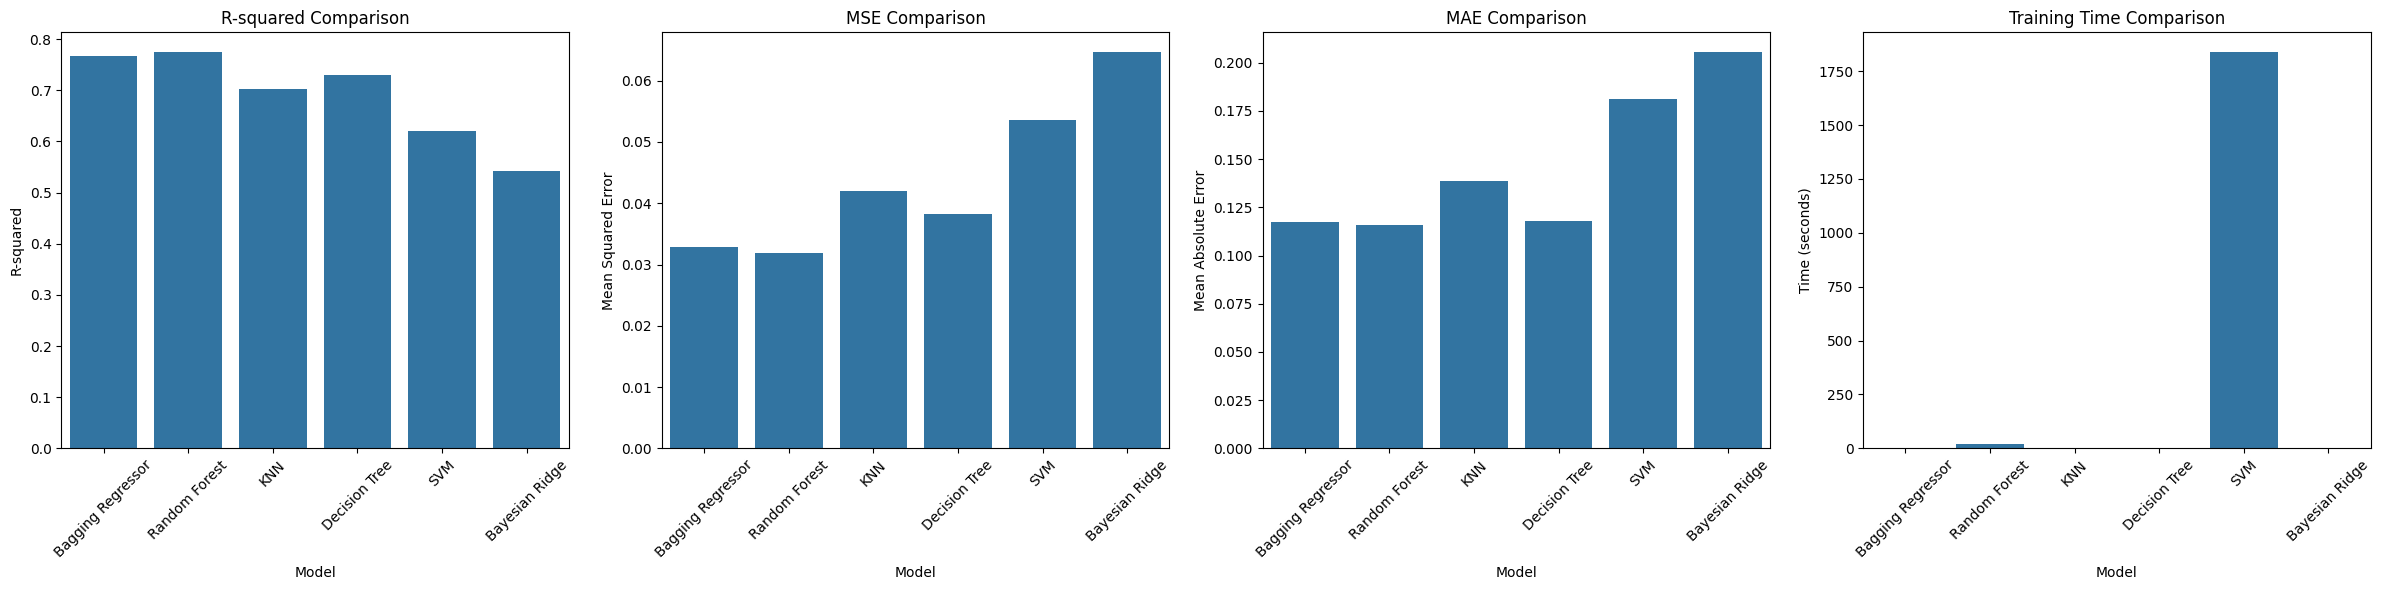

In [4]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

# Load and preprocess data
df = pd.read_csv('/content/update3.csv')
df = df.dropna(subset=['sellingprice'])

# Encode categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

# Prepare features and target variable
X = df[['make', 'odometer', 'body', 'color', 'condition', 'year']]
y = df['sellingprice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    'Bagging Regressor': BaggingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'SVM': SVR(),
    'Bayesian Ridge': BayesianRidge()
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    end_time = time.time()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    duration = end_time - start_time

    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2': r2, 'Time': duration}

# Print results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f" - Mean Squared Error: {metrics['MSE']:.4f}")
    print(f" - Mean Absolute Error: {metrics['MAE']:.4f}")
    print(f" - R-squared: {metrics['R2']:.4f}")
    print(f" - Training Time: {metrics['Time']:.4f} seconds\n")

# Plot the comparison of R-squared values
model_names = list(results.keys())
r2_scores = [results[model]['R2'] for model in model_names]
mse_scores = [results[model]['MSE'] for model in model_names]
mae_scores = [results[model]['MAE'] for model in model_names]
training_times = [results[model]['Time'] for model in model_names]

fig, ax = plt.subplots(1, 4, figsize=(24, 6))

# R-squared
sns.barplot(x=model_names, y=r2_scores, ax=ax[0])
ax[0].set_title('R-squared Comparison')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('R-squared')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# MSE
sns.barplot(x=model_names, y=mse_scores, ax=ax[1])
ax[1].set_title('MSE Comparison')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)

# MAE
sns.barplot(x=model_names, y=mae_scores, ax=ax[2])
ax[2].set_title('MAE Comparison')
ax[2].set_xlabel('Model')
ax[2].set_ylabel('Mean Absolute Error')
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)

# Training Time
sns.barplot(x=model_names, y=training_times, ax=ax[3])
ax[3].set_title('Training Time Comparison')
ax[3].set_xlabel('Model')
ax[3].set_ylabel('Time (seconds)')
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Confusion Matrix

In [1]:
import pandas as pd

df=pd.read_csv('/content/update3.csv')

In [3]:
# Chọn các cột cần thiết
columns_needed = ['odometer', 'color', 'condition', 'make', 'body', 'year', 'sellingprice']
data_subset = df[columns_needed]

# Kiểm tra và xử lý giá trị NaN
data_subset = data_subset.dropna()

# Kiểm tra lại dữ liệu sau khi xử lý NaN
print("\nDữ liệu sau khi xử lý NaN:")
print(data_subset.isna().sum())
print(data_subset.head())



Dữ liệu sau khi xử lý NaN:
odometer        0
color           0
condition       0
make            0
body            0
year            0
sellingprice    0
dtype: int64
   odometer  color  condition    make   body      year  sellingprice
0       0.0  white   0.000000     Kia    SUV  1.000000      1.000000
1       0.0  white   0.000000     Kia    SUV  1.000000      1.000000
2       0.0   gray   1.000000     BMW  Sedan  0.941176      1.000000
3       0.0  white   0.666667   Volvo  Sedan  1.000000      1.000000
4       0.0   gray   0.000000  Nissan  Sedan  1.000000      0.333333


In [5]:
# Loại bỏ các hàng có giá trị trùng lặp trong sellingprice nếu cần
data_subset = data_subset.drop_duplicates(subset=['sellingprice'])

# Chuyển đổi cột mục tiêu thành các nhãn phân loại
bins = pd.qcut(data_subset['sellingprice'], q=4, labels=False, duplicates='drop')  # Chia thành 4 nhóm
data_subset['price_class'] = bins

# Kiểm tra lại dữ liệu sau khi chuyển đổi
print("\nDữ liệu sau khi chuyển đổi mục tiêu:")
print(data_subset.head())



Dữ liệu sau khi chuyển đổi mục tiêu:
    odometer   color  condition       make         body      year  \
0        0.0   white        0.0        Kia          SUV  1.000000   
4        0.0    gray        0.0     Nissan        Sedan  1.000000   
7        0.0     red        0.0  Chevrolet  Convertible  0.941176   
13       0.0  silver        0.0  Chevrolet        Sedan  1.000000   

    sellingprice  price_class  
0       1.000000            3  
4       0.333333            1  
7       0.666667            2  
13      0.000000            0  


<ipython-input-5-7c8f2d859fae>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['price_class'] = bins


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Mã hóa các cột chuỗi
encoder = LabelEncoder()
for column in ['color', 'condition', 'make', 'body']:
    data_subset[column] = encoder.fit_transform(data_subset[column])

# Chia dữ liệu thành feature và target
X = data_subset[['odometer', 'color', 'condition', 'make', 'body', 'year']]
y = data_subset['price_class']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước dữ liệu sau khi chia
print("\nKích thước của tập huấn luyện và tập kiểm tra:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Kích thước của tập huấn luyện và tập kiểm tra:
X_train: (3, 6)
X_test: (1, 6)
y_train: (3,)
y_test: (1,)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Bagging Classifier:
Confusion Matrix:
[[0 1]
 [0 0]]
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



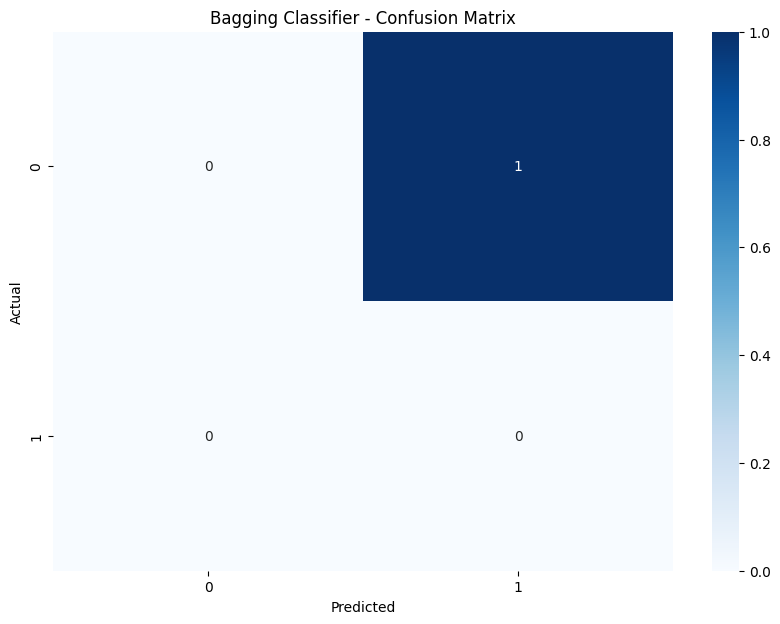

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Random Forest Classifier:
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



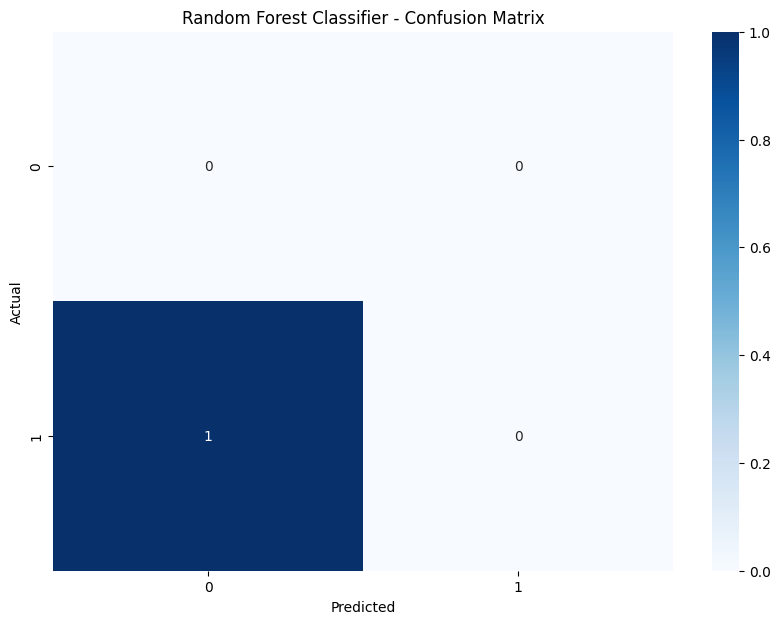

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


KNN Classifier:
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



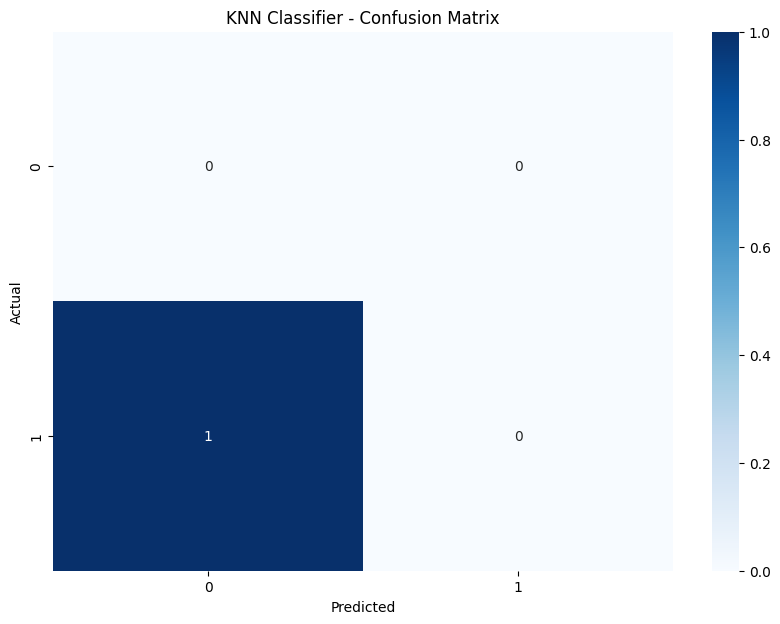

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Decision Tree Classifier:
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



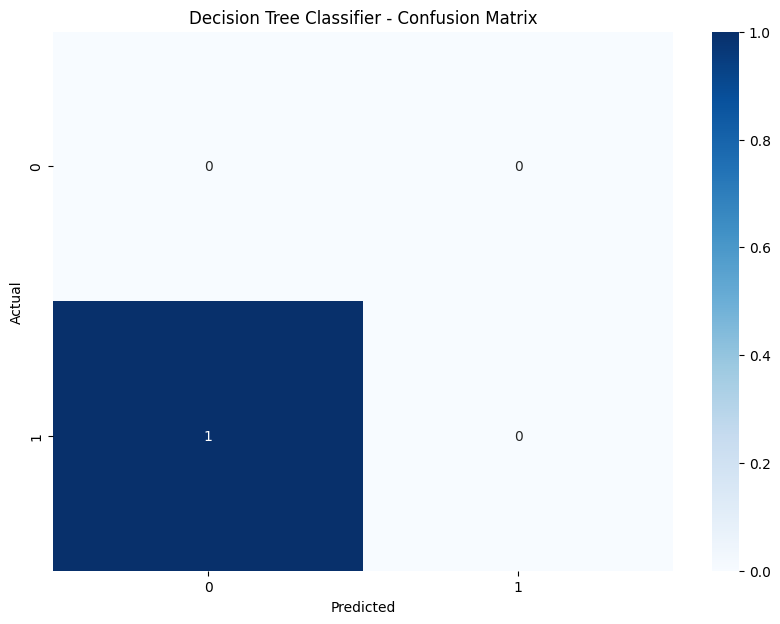

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


SVM Classifier:
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



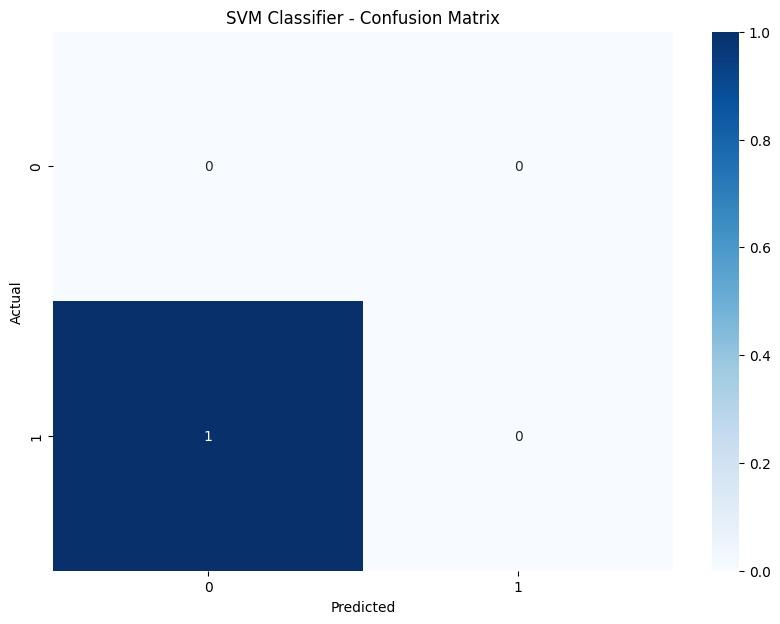

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.


Naive Bayes Classifier:
Confusion Matrix:
[[0 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



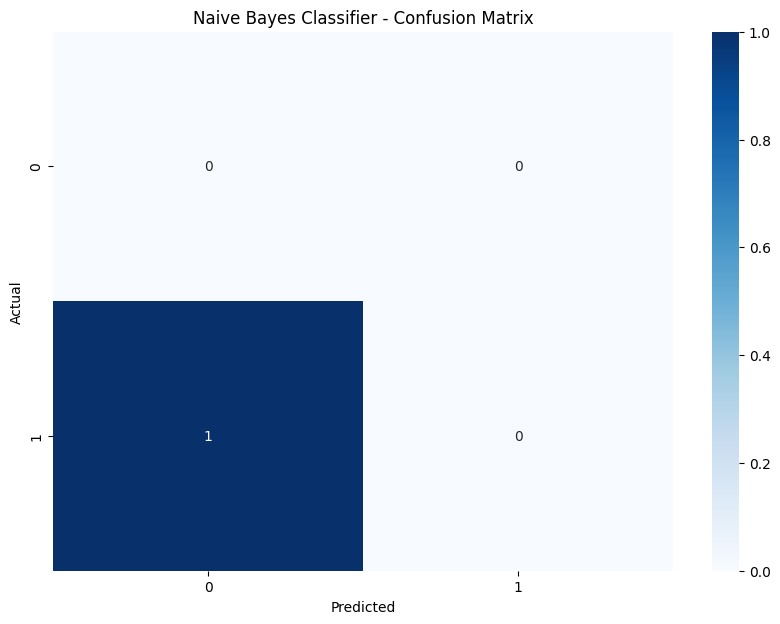

In [10]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các mô hình phân loại
models = {
    'Bagging': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=2),  # Giảm số lượng hàng xóm để tránh lỗi
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='linear'),
    'Naive Bayes': GaussianNB()
}

# Huấn luyện các mô hình và tạo ma trận nhầm lẫn
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Tạo ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f'\n{name} Classifier:')
    print('Confusion Matrix:')
    print(cm)
    print('Classification Report:')
    print(report)

  # Vẽ biểu đồ ma trận nhầm lẫn
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Classifier - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()